In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [3]:
# Load the dataset
df = pd.read_csv(r'C:\AI\DataSet\WineQT.csv')
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,6
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,8
9,6.7,0.58,0.08,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2,5,10


In [4]:
# Display information about the dataset
print("Number of Rows:", df.shape[0])
print("Number of Columns:", df.shape[1])
print("\nData Types:")
print(df.dtypes)

Number of Rows: 1143
Number of Columns: 13

Data Types:
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
Id                        int64
dtype: object


In [5]:
# Select only numeric columns
numeric_columns = df.select_dtypes(include=['float64']).columns

# Calculate summary statistics
summary_statistics = pd.DataFrame({
    'Mean': df[numeric_columns].mean(),
    'Median': df[numeric_columns].median(),
    'Mode': df[numeric_columns].mode().iloc[0],  # Mode can have multiple values, we choose the first
    'Range': df[numeric_columns].max() - df[numeric_columns].min(),
    'Standard Deviation': df[numeric_columns].std()
})

# Display the summary statistics
print("Summary Statistics for Numerical Features:")
print(summary_statistics)

Summary Statistics for Numerical Features:
                           Mean    Median     Mode      Range  \
fixed acidity          8.311111   7.90000   7.2000   11.30000   
volatile acidity       0.531339   0.52000   0.5000    1.46000   
citric acid            0.268364   0.25000   0.0000    1.00000   
residual sugar         2.532152   2.20000   2.0000   14.60000   
chlorides              0.086933   0.07900   0.0800    0.59900   
free sulfur dioxide   15.615486  13.00000   6.0000   67.00000   
total sulfur dioxide  45.914698  37.00000  28.0000  283.00000   
density                0.996730   0.99668   0.9976    0.01362   
pH                     3.311015   3.31000   3.3000    1.27000   
sulphates              0.657708   0.62000   0.6000    1.67000   
alcohol               10.442111  10.20000   9.5000    6.50000   

                      Standard Deviation  
fixed acidity                   1.747595  
volatile acidity                0.179633  
citric acid                     0.196686  
resi

In [6]:
# Select object-type columns as potential categorical features
categorical_columns = df.select_dtypes(include=['object']).columns

# Display frequency distribution and unique values
for column in categorical_columns:
    print(f"\nExploring Categorical Feature: {column}")
    print(f"Frequency Distribution:\n{df[column].value_counts()}\n")
    print(f"Unique Values: {df[column].unique()}\n")

<Figure size 1500x1000 with 0 Axes>

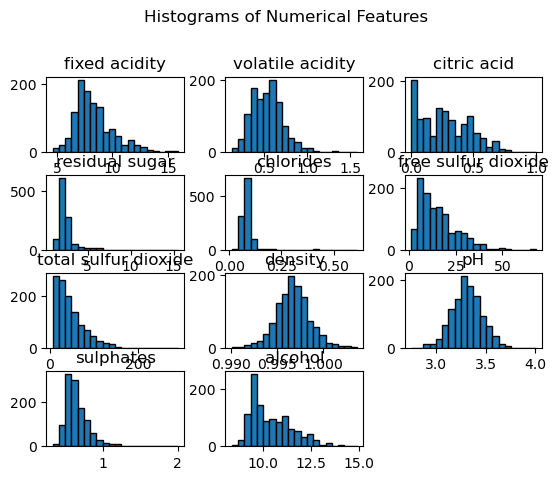

NameError: name 'sns' is not defined

<Figure size 1500x1000 with 0 Axes>

In [7]:
# Select only numeric columns
numeric_columns = df.select_dtypes(include=['float64']).columns

# Visualize distributions using histograms
plt.figure(figsize=(15, 10))
df[numeric_columns].hist(bins=20, edgecolor='black', grid=False)
plt.suptitle("Histograms of Numerical Features", y=1.02)
plt.show()

# Visualize distributions using box plots
plt.figure(figsize=(15, 10))
sns.boxplot(data=df[numeric_columns])
plt.title("Box Plots of Numerical Features")
plt.show()

# Visualize relationships between numerical features using a correlation matrix
correlation_matrix = df[numeric_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [8]:
# Check for missing data
missing_values_count = df.isnull().sum()

# Display missing values count per column
print("Missing Values Count per Column:")
print(missing_values_count)

# Decide on the treatment strategy (Imputation or Removal)
# Example 1: Imputation using mean for numerical columns
# Example 2: Removal of rows with missing values

# Example 1: Imputation using mean for numerical columns
imputer_mean = SimpleImputer(strategy='mean')
df_imputed_mean = pd.DataFrame(imputer_mean.fit_transform(df), columns=df.columns)

# Example 2: Removal of rows with missing values
df_no_missing = df.dropna()

Missing Values Count per Column:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64


NameError: name 'SimpleImputer' is not defined

In [9]:
# Select categorical columns (assuming 'Category' is a categorical column, adjust as needed)
categorical_columns = df.select_dtypes(include=['object']).columns

# Create a new DataFrame with one-hot encoded categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_columns)

# Alternatively, use sklearn's OneHotEncoder for more control
# encoder = OneHotEncoder()
# df_encoded = pd.DataFrame(encoder.fit_transform(df[categorical_columns].values.reshape(-1, 1)).toarray(),
#                            columns=encoder.get_feature_names_out(categorical_columns))

# Display the DataFrame with one-hot encoding
print("DataFrame with One-Hot Encoding:")
print(df_encoded.head())

DataFrame with One-Hot Encoding:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1

In [10]:
# Select only numeric columns
numeric_columns = df.select_dtypes(include=['float64']).columns

# Option 1: Normalize (Min-Max scaling) numerical features to the range [0, 1]
scaler_minmax = MinMaxScaler()
df_normalized = pd.DataFrame(scaler_minmax.fit_transform(df[numeric_columns]), columns=numeric_columns)

# Option 2: Standardize numerical features (z-score normalization)
scaler_standard = StandardScaler()
df_standardized = pd.DataFrame(scaler_standard.fit_transform(df[numeric_columns]), columns=numeric_columns)

# Display the DataFrames after scaling
print("DataFrame after Min-Max Scaling (Normalization):")
print(df_normalized.head())

print("\nDataFrame after Standardization:")
print(df_standardized.head())

NameError: name 'StandardScaler' is not defined

In [11]:
# Assuming 'target_column' is the column you want to predict (replace it with the actual target column name)
target_column = 'target_column'

# Separate features (X) and target variable (y)
X = df.drop(columns=[target_column])
y = df[target_column]

# Split the dataset into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

KeyError: "['target_column'] not found in axis"

In [12]:
# Assume you want to create a new feature representing the ratio of two existing features
# Example: Creating a new feature 'alcohol_content_ratio' as the ratio of 'alcohol' to 'density'
df['alcohol_content_ratio'] = df['alcohol'] / df['density']

# Display the DataFrame with the new feature
print("DataFrame with New Feature:")
print(df.head())

DataFrame with New Feature:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  alcohol_content_ratio  
0      9.

In [14]:
# Assume 'target_column' is the column you want to predict (replace it with the actual target column name)
target_column = 'target_column'

# Separate features (X) and target variable (y)
X = df.drop(columns=[target_column])
y = df[target_column]

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Example 1: Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
print("Accuracy (Decision Tree):", accuracy_score(y_test, y_pred_dt))
print("Classification Report (Decision Tree):\n", classification_report(y_test, y_pred_dt))

# Example 2: Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Accuracy (Random Forest):", accuracy_score(y_test, y_pred_rf))
print("Classification Report (Random Forest):\n", classification_report(y_test, y_pred_rf))

# Example 3: Support Vector Machines (SVM) Classifier
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
print("Accuracy (SVM):", accuracy_score(y_test, y_pred_svm))
print("Classification Report (SVM):\n", classification_report(y_test, y_pred_svm))

KeyError: "['target_column'] not found in axis"